<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg"></img>
<center>
<h1>Algorísmica Avançada 2021</h1>
<h2>Laboratori 5 - Enumeratius, Ramificació i Poda</h2>
</center>
</div>

In [1]:
import sys
sys.path.insert(0, '../../')

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Backtracking

El <b>backtracking</b> és una tècnica d'exploració exhaustiva, és a dir, que explora tots els possibles estats d'un problema. La implementació d'un algorisme mitjançant backtracking no és gaire diferent a les estratègies de recursió que hem vist fins ara peró amb un matís important que veurem a continuació. Tots els algorismes de backtracking es caracteritzen per anar avançant fins que es pugui i, en cas d'arribar a un punt on no podem seguir explorant, <b>desfer el camí fins a l'últim punt possible</b> i explorar els següents estats.<br><br>
Un exemple per al problema de les N-Reines (N=4) el podeu veure representat en la figura següent.<br>
Observeu com inicialment es col·loca una reina a la primera casella (0,0) i, al no arribar a una solució, s'acaba movent a la posició (1,0).
<img src="https://i.imgur.com/FYu8t3s.gif" width='20%'/>


## Com programem algorismes usant backtracking?

Tot algorimse de backtracking ha de tenir, com a mínim, els següents tres blocs de codi.

<img src="img/backscheme.png" width='40%'/>

<ol>
    <li><b>Solució trobada</b>: Hem de tenir una forma de comprovar si hem arribat a una solució. En el cas que aquest sigui l'únic objectiu del problema, ja haurem acabat i simplement haurem de desfer les crides recursives.
    <li><b>Exploració</b>: Donat un estat actual, mirem quins moviments podem fer (si és que en podem fer algun!). Triem un dels moviments (seguint un criteri, o no) i cridem recursivament la funció esperant trobar una solució al problema. En el cas que el resultat d'una exploració no hagi retornat cap solució vàlida, hem de desfer el moviment que havíem fet.
    <li><b>Estat no vàlid</b>: En el cas que durant l'exploració ens trobem amb un estat que no es vàlid per seguir explorant, per exemple, no podem fer cap altre moviment i tampoc hem resolt el problema, avisem a les crides anteriors d'això per a que puguin desfer-lo.
</ol>

<div class="alert alert-success">
    <h1>Problema 1: Lights Out!</h1>
    <img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/LightsOutIllustration.svg" width='70%'>
    <p>
        Lights Out és un joc que consisteix en encendre o apagar totes les llums d'un tauler de dimensió $W\times H$ en el <b>mínim nombre de clics possibles</b>. L'objectiu d'aquest problema és una mica diferent. Donades dues configuracions de tauler (per exemple la primera i última imatge de la figura anterior), volem trobar el mínim nombre de clics que ens permeten transformar un tauler en l'altre.<br><br>
        Cada cel·la de la graella té dos estats possibles (encesa/apagada) i al fer clic sobre una cel·la es canvia l'estat d'ella mateixa i de les cel·les adjacents horitzontals i verticals com podeu veure representat també en la figura anterior.<br><br>
        Implementeu les dues funcions <b>compare_grids</b> i <b>solve_lights_out</b>. 
        <ol>
            <li>La funció <b>compare_grids</b> ha de retornar un valor de similitud entre dues graelles.
            <li>La funció <b>solve_lights_out</b> ha d'implementar estratègies de backtracking i/o ramificació i poda per tal d'optimitzar el màxim el temps d'execució. Podeu plantejar-vos també usar cues de prioritat per prioritzar l'expansió de certs estats en concret.
        </ol>        
    La classe <b>LightsOut</b> conté una sola variable, <b>grid</b> amb la representació de cada posició de la graella.<br>
    Té implementades les funcions <b>click, board_id, show_board</b> que s'expliquen a continuació.    
    </p>
    
</div>

In [2]:
from lights_out import LightsOut
import random
from matplotlib import pyplot as plt

### Generació de taulers aleatoris

In [3]:
# Generem dos configuracions aleatòries
W, H = 3,4
shuffle = 100

# Inicialitzem dos objectes amb la dimensió de la graella
a = LightsOut(W, H) # Configuració inicial
b = LightsOut(W, H) # Configuració objectiu

# Clicks aleatoris
for _ in range(shuffle):
    i, j = random.randint(0, len(b.grid)-1), random.randint(0, len(b.grid[0])-1)
    b = b.click(i,j)
    
for _ in range(shuffle):
    i, j = random.randint(0, len(a.grid)-1), random.randint(0, len(a.grid[0])-1)
    a = a.click(i,j)

### Mostrem els dos taulells generats

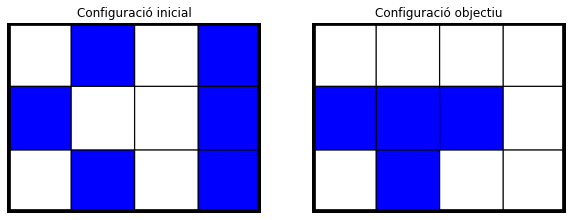

In [4]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

a.show_board(ax = axs[0])
axs[0].set_title('Configuració inicial')
b.show_board(ax = axs[1])
axs[1].set_title('Configuració objectiu')

plt.show()

### Ús de la variable 'grid' i de les funcions 'board_id()', 'click()' i 'show_board()'

In [5]:
# Podem accedir a a la graella amb la variable 'grid'
a.grid

[['-', 'X', '-', 'X'], ['X', '-', '-', 'X'], ['-', 'X', '-', 'X']]

In [6]:
# Podem usar un identificador únic de cada graella cridant a board_id()
a.board_id()

-1895081432520960518

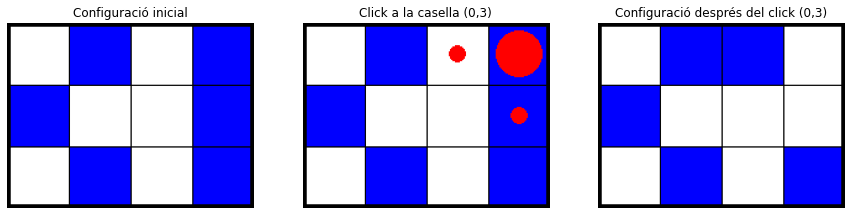

In [7]:
# Inicialitzem una figura amb tres subfigures i hi mostrem en primer lloc la configuració inicial
fig, axs = plt.subplots(1,3,figsize=(15,4))
a.show_board(ax = axs[0])
axs[0].set_title('Configuració inicial')

# Triem un punt aleatori i mostrem el click.
i, j = random.randint(0, len(a.grid)-1), random.randint(0, len(a.grid[0])-1)
a.show_board(ax = axs[1], show_click=(i,j))
axs[1].set_title(f'Click a la casella ({i},{j})')

# Executem el click i mirem el resultat
new_a = a.click(i,j)
new_a.show_board(ax = axs[2])
axs[2].set_title(f'Configuració després del click ({i},{j})')

plt.show()

In [8]:
from queue import PriorityQueue

def compare_grids(l1, l2):
    """
    Aquesta funció assigna una puntuació a la similitud entre l1 i l2.
    
    Params
    ======
    :l1, l2: Dos objectes de tipus LightsOut
    
    Returns
    =======
    :score: Una puntuació entre aquests dos elements.
    """
    # Farem una implementació básica en la que recorrem
    # les caselles dels dos taulers i comprovem a cada casella
    # si està en el mateix estat (encès o apagat)
    
    # Inicialitzem la puntuació entre els dos taulers (l1 i l2) a 0
    score = 0
    
    # Com he comentat abans, recorrem totes les casellescomprovant si els dos taulers en aquella posició es troben
    # en el mateix estat (encès o apagat)
    for i in range(len(l1.grid)): # per cada columna
        for j in range(len(l1.grid[0])): # per cada fila
            if l1.grid[i][j] == l2.grid[i][j]:
                score += 1
            
    return score

def solve_lights_out(ini, tar):
    """
    Aquesta funció soluciona el problema Lights Out i retorna una solució de moviments mínims.
    
    Params
    ======
    :ini, tar: Dos objectes de tipus LightsOut
    
    Returns
    =======
    :expanded: Número de taulers que s'han expandit
    :best_moves: La seqüència de moviments que s'han de realitzar per arribar d'un tauler a l'altre en el format [(0,0), (3,2), (1,2),...]
    """
    # Inicialització dels valors que haurem de retornar
    expanded = 0
    best_moves = []
    
    # Crida a la funció auxiliar per tal de fer el backtracking i anar construïnt la nostra solució (i sobretot, amb el menor número de clicks
    # possible)
    # Les configuracions tenen un id que les identifica, si dues tenen la mateixa configuració tindràn el mateix id; per això les configuracions
    # ja provades les guardarem en un set
    # També guardarem en un set els clicks que fem i que poden arribar a la configuració del target
    expanded, best_moves = backtracking_lights_out(ini, tar, expanded, best_moves, set(), set())
    
    # Aquest return ja és el del nombre total de taulers que s'han expandit i quina és la millor seqüència de moviments que s'han realitzat
    # per arribar d'un tauler a l'altre, en format d'una llista de tuples
    return expanded, best_moves

def backtracking_lights_out(ini, tar, exp, best_moves, clicks, visited):
        
        # Comprovació de si s'ha trobat la solució seguint l'esquema de backtracking (if solution == true).
        # Les condicions per haver trobat la configuració target i per saber si em d'actualitzar la millor solució són les següents:
        #     1. Si el id del tauler ini (tauler actual) i del tauler tar són els mateixos, voldrà dir que ja hem aconseguit la configuració objectiu. 
        #     2. Si encara no tenim res a best_moves (len == 0) vol dir que és el primer cop que trobem un seguit de clicks possibles per arribar
        #        a la configuració final, per tant actualitzem best_moves amb els clicks actuals que ens han portat a una solució i retornem best_moves
        #        i el nombre de taulers expandits
        #     3. O bé si ja teniem una solució a best_moves, però era amb un nombre més gran de clicks que els que portem en aquesta iteració, actualitzem best_moves
        #        i retornem el mateix que en el cas 2.
        if ini.board_id() == tar.board_id():
            if len(best_moves)==0 or len(best_moves)>len(clicks):
                best_moves = clicks.copy()    
                return exp, best_moves
            
        #Per cada crida a la funció recursiva, haurem expandit un tauler més (situo l'increment després de la comprovació de l'if ja que considero que en
        # l'hipotètic cas en que ini i tar fosin iguals a la primera crida a la funcio de backtracking_lights_out, no hauriem expandit cap tauler)
        exp+=1
        
        # Per tal de continuar explorant (keep exploring de l'esquema), s'han de complir un seguit de condicions:
        #     1. Si encara no hem trobat solució ja que best_moves és buit.
        #     2. O bé si la configuració que estem provant no és més gran que la solució que ja tenim guardada a best_moves.
        #     3. I la condició excloent de si aquesta configuració no ha estat provada anteriorment (ho sabem perquè tenim un set on guardem els id's de les
        #        configuracions de taulers ja provades) ja que no serà solució
        if (len(best_moves)==0 or len(best_moves)>len(clicks)) and ini.board_id() not in visited:
            # Farem ús d'una PriorityQueue per ordenar els possibles clicks a realitzar en el tauler actual segons el score que ens retorni compare_grids desprès
            # de fer click en una certa posició del tauler. Els ordenarem de major a menor, per començar a provar pels clicks que ens ofereixen una millor similitud
            # amb el target.
            cua = PriorityQueue()
            
            # Recorrem totes les caselles del tauler (for each possible moves de l'esquema)
            for i in range(len(ini.grid)):
                for j in range(len(ini.grid[0])):
                    # Si la present casella (i,j) no està dins dels clicks que ja hem realitzat anteriorment (if this move is valid,
                    # de l'esquema), l'afegim a la Priority Queue.
                    if (i,j) not in clicks:
                        # Per tal d'ordenar els clicks dins de la Priority Queue cridarem a la funció compare_grids amb el tauler actual
                        # havent fet click a la casella que estem tractant i el target, per tal de que ens retorni un score (grau de
                        # similitud entre els dos taulers)
                        cua.put((compare_grids(ini.click(i,j),tar),(i,j)))
            
            # Mentre hi hagi algún click a fer a la cua
            while not cua.empty():
                # Agafem el click de major score de la cua (alhora es farà el dequeue)
                click = cua.get()[1]
                
                # Per tal de cridar recursivament a la funció backtracking_lights_out, seleccionem el click (afegint-lo a clicks)
                # i fem la crida (select this move and place, de l'esquema)
                clicks.add((click[0],click[1]))
                
                # Fem les crides recursives
                exp, best_moves = backtracking_lights_out(ini.click(click[0],click[1]), tar, exp, best_moves, clicks, visited)
                
                # Desfem els clicks necessàris d'haver cridat a la funció recursiva (unplace that selected move, de l'esquema)
                clicks.discard((click[0],click[1]))
                
        # Si hem arribat fins aquí, vol dir que no hi ha solució en aquesta configuració, per tant l'afegim al conjunt de visitades
        # (fent ús del seu id). Equival a l'última part de l'esquema.
        visited.add(ini.board_id())
        return exp, best_moves
    
def show_steps(ini, tar, steps):
    """
    Mostra una figura per pas donat un tauler inicial i un conjunt de passos
    
    Params
    ======
    :ini: Un objecte de la classe LightsOut amb la configuració original
    :tar: Un objecte de la classe LightsOut amb la configuració objectiu
    :steps: Una llista de passos amb el format [(0,0), (3,2), (1,2),...]
    """
    fig, axs = plt.subplots(1, len(steps)+2, figsize=(30,5))
    axs = axs.flatten()
    for i, step in enumerate(steps):
        ini.show_board(ax=axs[i], show_click=step)
        axs[i].set_title(f"Click at {step}")
        ini = ini.click(*step)
    ini.show_board(ax=axs[i+1])
    axs[i+1].set_title(f'Result after {len(steps)} steps')
    tar.show_board(ax=axs[i+2])
    axs[i+2].set_title(f'Target configuration')
    plt.show()

Proveu-ho aquí:

In [9]:
expanded, moves = solve_lights_out(a,b)

Expanded boards: 22288


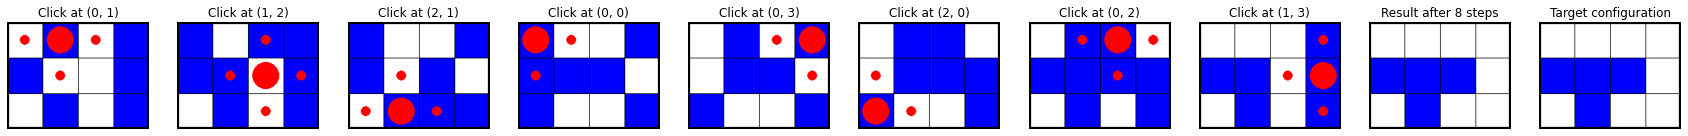

In [10]:
print('Expanded boards:',expanded)
show_steps(a, b,moves)

<div class="alert alert-success">
    <h1>Problema 2: Roomba!</h1>
    <p>
        En el nostre pis quadrat, tenim una roomba endollada a la seva base de càrrega. Volem que visiti un seguit de punts que hem embrutat i que ho faci en el menor temps possible. Si el nostre pis és de $W\times H$ cel·les i la roomba està situada inicialment a les coordenades $(x_0,y_0)$ volem trobar el menor nombre de passos possibles $p$ d'un recorregut que comenci i acabi a $(x_0,y_0)$ i que visiti tots els punts.<br><br>
        Implementeu la funció <b>solve_roomba</b> utilitzant estratègies de backtracking i ramificació i poda. Ha de retornar els taulers expandits i un camí que comenci i acabi a $(x_0,y_0)$ passant per tots els punts que es demanen. També heu d'implementar les funcions <b>inferior_bound</b> i <b>superior_bound</b> per a que retornin una cota inferior i superior, respectivament.
        <ol>
            <li><b>Cota inferior</b>: Considereu que tots els punts estan alinets horitzontalment amb la roomba. Quin seria el cost de visitar tots els punts en aquest cas?
            <li><b>Cota superior</b>: Trobeu una solució, no òptima evidentment, usant una estratègia greedy. Com a mínim ja tindrem una solució que, segurament, no serà la millor però la podrem fer servir per comparar durant l'execució del nostre algorisme.
        </ol>
        La classe <b>Roomba</b> conté quatre variables:
        <ol>
            <li><b>H, W</b>: amb les dimensions del pis.
            <li><b>origin</b>: una parella $(x_0,y_0)$ amb l'estació de càrrega de la roomba.
            <li><b>points</b>: una llista de parelles diferents entre elles $(i,j)$ amb els punts que s'han de netejar.
        </ol>
    </p>
    
</div>

In [11]:
from roomba import Roomba

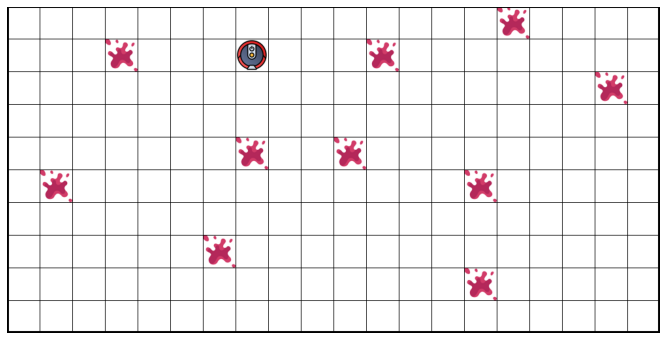

In [12]:
# Inicialitzem un tauler aleatori
H, W = 10,20
r = Roomba(H, W)
num_points = 10

points = random.sample([(i,j) for i in range(H) for j in range(W)], num_points)
origin = random.choice([(i,j) for i in range(H) for j in range(W)])
while origin in points:
    origin = random.choice([(i,j) for i in range(H) for j in range(W)])

# Afegim els punts a netejar i l'orígen
r.set_points(points)
r.set_origin(origin)

# Mostrem la graella
r.show_board()

## Distància de Manhattan
La distància de manhattan ens permet trobar la distància entre dos punts d'una graella. A diferència de la <b>distància euclidiana</b> (blava), la <b>distància de manhattan</b> (vermella) no contempla la distància en línia recta sinó que té en compte la morfologia de la grella. D'aquesta forma ens dóna una distància real entre dos punts d'una ciutat quadriculada o del taulell del problema que volem resoldre.

<img src='https://static.packt-cdn.com/products/9781787121515/graphics/bd978c4c-8251-489d-bcda-5ce7b7b825dd.png' width='20%'>

In [13]:
def manhattan_dist(point1, point2):
    """
    Donats dos punts point1, point2, retorna la distància de manhattan
    
    Params
    ======
    :point1, point2: Dos punts amb el format point1=(a1,b1), point2=(a2,b2)
    
    Returns
    =======
    :dist: La distància de manhattan entre els dos punts. dist = |a1-a2| + |b1-b2|
    
    """
    a1, b1 = point1
    a2, b2 = point2
    return abs(a1-a2)+abs(b1-b2)

In [14]:
def superior_bound(roomba):
    """
    Retorna la cota superior inicial per al problema de la Roomba usant una estratègia greedy.
    
    Params
    ======
    :roomba: Un objecte de la classe Roomba. Podeu accedir a les variables roomba.points, roomba.origin, roomba.W, roomba.H
    
    Returns
    =======
    :sup: La cota inferior incial per a aquest problema. 
    """
    # Una possible solució per calcular una cota
    # superior és una que passi per tots els punts
    # usant una estratègia greedy; si el camí que
    # portem és més gran que aquesta cota superior
    # ja no continuem
    
    # Inicialitzem la cota superior a 0
    sup = 0
    
    # Inicialitzem la posició inicial amb l'origen
    # de la roomba
    pos = roomba.origin
    
    # Inicialitzem la llista de punts que falten per
    # visitar amb tots els punts que ha de visitar/netejar la roomba
    points = roomba.points.copy()
    
    # Iterem mentre la roomba tingui encara punts a visitar
    while (len(points) > 0):
        # Calcularem el punt (a netejar) que està més
        # a prop de la roomba usant una estratègia greedy,
        # recorrent-los tots
        
        # height & width del tauler, seria recorrer
        # tots els punts del tauler
        minimum_distance = roomba.H * roomba.W 
        
        # El punt més proper (el mínim) abans de
        # calcular un altre és quedar-nos on estem
        minimum_point = pos 
        
        # Recorrem tots els punts
        # Pel càlcul de la distància a un punt farem
        # servir la distància de manhattan ja que no
        # contempla la distància en línia recta sinó que té en compte 
        # la morfologia de la graella. D'aquesta forma
        # ens dóna una distància real entre dos punts
        # d'una ciutat quadriculada o del taulell del
        # problema que volem resoldre.
        for point in points:
            distance = manhattan_dist(pos, point)
            
            # Si la distància calculada es menor
            # que la que ja teniem, l'actualitzem
            if(distance < minimum_distance):
                minimum_point = point
                minimum_distance = distance
        
        # Un cop trobat el punt que està més a prop
        # de la roomba, sumem la distància fins aquest
        # punt a la cota superior i movem la roomba a
        # la nova posició
        # Actualitzem també la llista de punts restants a
        # netejar eliminant de la llista el punt actual
        sup += minimum_distance
        pos = minimum_point
        points.remove(minimum_point)
        
    # Quan ja haguem visitat tots els punts a netejar per
    # la roomba, haurem de sumar a la cota superior la
    # distancia que té fins tornar a l'origen (i.e. base de càrrega)
    # Per calcular aquesta distància, utilitzarem la distància de manhattan
    sup += manhattan_dist(pos, roomba.origin)
    
    return sup

def inferior_bound(roomba):
    """
    Retorna la cota inferior inicial per al problema de la Roomba. Considereu que tots els punts estan alineats i calculeu-ne el cost de visitar-los tots i tornar a la base de càrrega.
    
    Params
    ======
    :roomba: Un objecte de la classe Roomba. Podeu accedir a les variables roomba.points, roomba.origin, roomba.W, roomba.H
    
    Returns
    =======
    ::
    """
    # Si considerem que tots els punts estan alineats,
    # el cost de visitar-los tots serà la longitud de
    # la llista de punts a visitar * 2 (ja que em de
    # tornar a la base de càrrega)
    # Segons l'enunciat hauriem d'implementar el següent: inf = len(roomba.points) * 2
    # Tot i així, implementaré una cota inferior més òptima que m'assegura una distància menor, que serà calcular la distància de manhattan fins al punt més proper i tornar a la base
    # de càrrega
    inf = float('inf')
    
    for point in roomba.points:
        dist = manhattan_dist(roomba.origin, point)
        
        if dist < inf:
            inf = dist
    
    return inf * 2

In [15]:
def solve_roomba(roomba):
    """
    Soluciona el problema de trobar el camí mínim en una graella 2-Dimensional passant per un seguit de punts.
    
    Params
    ======
    :roomba: Un objecte de la classe Roomba
    
    Returns
    =======
    :expanded: Número de taulers que s'han expandit
    :best_moves: La seqüència de moviments que ha de realitzar la roomba per visitar tots els punts amb el format [(0,0), (0,1), (0,2),...,(0,0)]
    """
    # Inicialitzem les cotes superior i inferior
    sup_bound = superior_bound(roomba)
    inf_bound = inferior_bound(roomba)
    
    # Inicialitzem el nombre de taulers que s'hauran expandit
    expanded = 0
    
    # Inicialitzem la llista de tuples amb la seqüència de moviments que ha de realitzar la roomba per visitar tots els punts
    best_moves = []
    
    # Fem la crida a la funció auxiliar que ens farà el backtracing per tal de construir el millor camí possible
    expanded, best_moves, sb = backtracking_roomba(roomba, [roomba.origin], best_moves, 0, sup_bound, inf_bound, expanded)
    
    # best_moves ens guarda l'ordre de les caselles que em de visitar, però no el recorregut que haurem de fer per anar d'una casella a un altre
    # ja que si retornem directament best_moves, el path de la roomba creuarà caselles en diagonal, cosa que en el problema no pot fer (estaria seguint
    # la distància euclidiana entre els punts).
    # best_moves és de l'estil [(0,0), ... punts a visitar ..., (0,0)]
    # Per tant, implementarem el recorregut que ha de seguir la roomba a continuació:
    
    # len(best_moves) serà == 0 només en el cas que hi hagi un sol punt a netejar en tot el tauler, per tant haurem de considerar aquest cas (en l'else més abaix)
    if(len(best_moves) != 0):
        # Inicialitzem una nova llista amb el primer punt de la llista de best_moves (és a dir, l'origen)
        path = [best_moves[0]]
    
        # Farem un bucle len(best_moves)-1 cops, ja que si per exemple tenim 5 punts, tindrem 4 subrecorreguts a fer:
        #     1. Del primer punt al segon
        #     2. Del segon punt al tercer
        #     3. Del tercer punt al quart
        #     4. Del quart punt al cinquè
    
        for i in range(len(best_moves)-1):
            # Separem les coordenades i,j del punt actual i del següent
            i0, j0 = best_moves[i]
            i1, j1 = best_moves[i+1]
        
            # Mentre els punts no estiguin a la mateixa fila, iterem fins que ho estiguin i per cada iteració afegim el moviment al recorregut
            while i0 != i1:
                # Si el punt actual es troba en una fila superior al següent punt, haurem de baixar de fila (augmentar en 1)
                if i0 < i1:
                    i0 += 1
            
                # En canvi si el punt actual es troba en una fila inferior al següent punt, haurem de pujar (disminuir en 1)
                else:
                    i0 -= 1
            
                # Afegim el moviment (punt al que ens hem mogut) al recorregut
                path.append((i0, j0))
            
            # Mateix procediment per les columnes
            while j0 != j1:
                # Si el punt actual es troba en una columna més a l'esquerra que el següent punt, ens movem a la dreta (augmentar en 1)
                if j0 < j1:
                    j0 += 1
                
                # En canvi si el punt actual es troba en una columna més a la dreta que el següent punt, ens movem a l'esquerra (disminuir en 1)
                else:
                    j0 -= 1
            
                # Afegim el moviment (punt al que ens hem mogut) al recorregut
                path.append((i0, j0))
            
        # Copiem el recorregut que hem construït a best_moves
        best_moves = path.copy()
    
        # Retornem el número de taulers que s'han expandit i la seqüència de moviments que ha de realitzar la roomba per visitar tots els punts
        return expanded, best_moves
  
    # Cas en que len(best_moves) sigui igual a 0, només passarà quan hi hagi un sol punt a netejar, ja que inferior bound == superior bound
    else:
        moves = [roomba.origin]
        
        for point in roomba.points:
            moves.append(point)
            
        moves.append(roomba.origin)
    
        path = [moves[0]]
        
        for i in range(len(moves)-1):
            # Separem les coordenades i,j del punt actual i del següent
            i0, j0 = moves[i]
            i1, j1 = moves[i+1]
        
            # Mentre els punts no estiguin a la mateixa fila, iterem fins que ho estiguin i per cada iteració afegim el moviment al recorregut
            while i0 != i1:
                # Si el punt actual es troba en una fila superior al següent punt, haurem de baixar de fila (augmentar en 1)
                if i0 < i1:
                    i0 += 1
            
                # En canvi si el punt actual es troba en una fila inferior al següent punt, haurem de pujar (disminuir en 1)
                else:
                    i0 -= 1
            
                # Afegim el moviment (punt al que ens hem mogut) al recorregut
                path.append((i0, j0))
            
            # Mateix procediment per les columnes
            while j0 != j1:
                # Si el punt actual es troba en una columna més a l'esquerra que el següent punt, ens movem a la dreta (augmentar en 1)
                if j0 < j1:
                    j0 += 1
                
                # En canvi si el punt actual es troba en una columna més a la dreta que el següent punt, ens movem a l'esquerra (disminuir en 1)
                else:
                    j0 -= 1
            
                # Afegim el moviment (punt al que ens hem mogut) al recorregut
                path.append((i0, j0))
            
        best_moves = path.copy()
       
        return expanded, best_moves
        
def backtracking_roomba(roomba, path, best_moves, dist, sup_bound, inf_bound, exp):
    # Si la superior bound és igual a la inferior bound, ens trobem a la millor situació possible (solution found de l'esquema de backtracking)
    # Per com he implementat les cotes inferiors i superiors, només és possible que siguin iguals si només existeix un punt a netejar. Podria també
    # fer aquesta comprovació abans de cridar a la funció de backtracking
    if inf_bound == sup_bound:
        return exp, best_moves, sup_bound
    
    # Exp ens compta el número de taulers que s'han expandit (igual al nombre de crides a la present funció)
    exp += 1
    
    # Guardem la posició actual
    pos = path[-1]
    
    # Si el camí actual ja té tots els punts que ha de visitar/netejar la roomba:
    if len(path) == len(roomba.points) + 1:
        # Mateix cas que solution found, però ara l'únic camí que queda és fins a l'origen ja que la roomba ha de tornar a la base
        # Per calcular aquesta distància fem ús de la distància de manhattan
        distance_point = manhattan_dist(pos, roomba.origin)
        
        # Si la cota superior és més gran que la distància recorreguda fins ara més la distància fins l'origen, l'actualitzem
        if sup_bound >= (dist + distance_point):
            sup_bound = dist + distance_point
            
            # Afegim al path tornar a l'origen
            path += [roomba.origin]
            
            # Fem una còpia del camí que tenim
            best_moves = path.copy()
    
    # Si encara hi ha punts a visitar/netejar
    else:
        # Iterem per tots els punts que ha de visitar la roomba, sempre que el punt no s'hagi visitat anteriorment (for each possible moves de l'esquema)
        for point in roomba.points:
            if point not in path:
                # Calculem la distància de manhattan des de la nostra posició fins al punt
                distance_point = manhattan_dist(pos, point)
                
                # Si la distància calculada més la distància que portem és estrictament inferior a la superior bound (si és igual ja la tenim de superior_bound),
                # cridem recursivament a la funció
                # if this move is valid (de l'esquema)
                if sup_bound > (dist + distance_point):
                    exp, best_moves, sup_bound = backtracking_roomba(roomba, path + [point], best_moves, dist + distance_point, sup_bound, inf_bound, exp)
                    
    # Si hem arribat aquí retornem les variables necessàries que puguin canviar de valor en les crides recursives
    return exp, best_moves, sup_bound

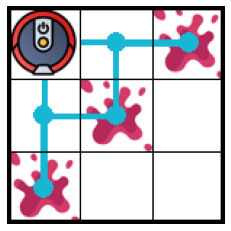

In [16]:
H, W = 3,3
r = Roomba(H, W)
r.set_origin((0,0))
r.set_points([(0,2),(1,1),(2,0)])

expanded, path = solve_roomba(r)
r.show_board(path=path)

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>

<p>
L'entrega es farà a través del campus virtual. Teniu fins el dia <b>30 de Desembre a les 23:55</b> per entregar la pràctica. A la tasca que obrirem al campus, <b>només heu d'entregar aquest fitxer .ipynb</b>. El notebook ha de tenir com a nom:
</p>
<p>
    <code>L5_Grup_Cognom_Nom.ipynb</code>
</p>
    <br>
On 'Grup' és una sola lletra que identifica el grup on esteu matriculats. Els grups disponibles són: A, B, C, F.

És imprescindible que respecteu el format de les funcions i que el vostre codi estigui degudament comentat.<br><br>
</div>